## 과제 1: 서울시 지하철 역별 이용객 수 분석
- 분석 기준 : 각 사용월별로 시간대별 총 승차인원과 평균 승차인원을 산출

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [29]:
subwayDF = pd.read_csv('./subway.csv', encoding='CP949', parse_dates=['사용월', '작업일자'])
subwayDF

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202401,1호선,동대문,901,23,11029,1950,8399,5567,13310,...,8733,553,2761,3,195,0,0,0,0,2024-02-03
1,202401,1호선,동묘앞,214,1,2921,933,3357,4411,7520,...,4065,109,1988,3,225,0,0,0,0,2024-02-03
2,202401,1호선,서울역,665,20,7969,7954,12987,52493,39529,...,12092,2476,3052,4,184,0,2,0,0,2024-02-03
3,202401,1호선,시청,65,0,2188,4984,3634,23116,7149,...,3222,635,986,0,20,0,0,0,0,2024-02-03
4,202401,1호선,신설동,373,37,9007,1995,9470,8563,20405,...,7943,320,2462,0,2,0,1,0,0,2024-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64339,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,2015-12-23
64340,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,2015-12-23
64341,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,2015-12-23
64342,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,2015-12-23


In [30]:
subwayDF['사용월'].unique()

array(['202401', '202312', '202311', '202310', '202309', '202308',
       '202307', '202306', '202305', '202304', '202303', '202302',
       '202301', '202212', '202211', '202210', '202209', '202208',
       '202207', '202206', '202205', '202204', '202203', '202202',
       '202201', '202112', '202111', '202110', '202109', '202108',
       '202107', '202106', '202105', '202104', '202103', '202102',
       '202101', '202012', '202011', '202010', '202009', '202008',
       '202007', '202006', '202005', '202004', '202003', '202002',
       '202001', '201912', '201911', '201910', '201909', '201908',
       '201907', '201906', '201905', '201904', '201903', '201902',
       '201901', '201812', '201811', '201810', '201809', '201808',
       '201807', '201806', '201805', '201804', '201803', '201802',
       '201801', '201712', '201711', '201710', '201709', '201708',
       '201707', '201706', '201705', '201704', '201703', '201702',
       '201701', '201612', '201611', '201610', '201609', '2016

In [31]:
subwayDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64344 entries, 0 to 64343
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   사용월           64344 non-null  object        
 1   호선명           64344 non-null  object        
 2   지하철역          64344 non-null  object        
 3   04시-05시 승차인원  64344 non-null  int64         
 4   04시-05시 하차인원  64344 non-null  int64         
 5   05시-06시 승차인원  64344 non-null  int64         
 6   05시-06시 하차인원  64344 non-null  int64         
 7   06시-07시 승차인원  64344 non-null  int64         
 8   06시-07시 하차인원  64344 non-null  int64         
 9   07시-08시 승차인원  64344 non-null  int64         
 10  07시-08시 하차인원  64344 non-null  int64         
 11  08시-09시 승차인원  64344 non-null  int64         
 12  08시-09시 하차인원  64344 non-null  int64         
 13  09시-10시 승차인원  64344 non-null  int64         
 14  09시-10시 하차인원  64344 non-null  int64         
 15  10시-11시 승차인원  64344 non-null  int64 

In [32]:
# 승차인원 컬럼 리스트
pops = [col for col in subwayDF.columns if '시 승차인원' in col]
pops

['04시-05시 승차인원',
 '05시-06시 승차인원',
 '06시-07시 승차인원',
 '07시-08시 승차인원',
 '08시-09시 승차인원',
 '09시-10시 승차인원',
 '10시-11시 승차인원',
 '11시-12시 승차인원',
 '12시-13시 승차인원',
 '13시-14시 승차인원',
 '14시-15시 승차인원',
 '15시-16시 승차인원',
 '16시-17시 승차인원',
 '17시-18시 승차인원',
 '18시-19시 승차인원',
 '19시-20시 승차인원',
 '20시-21시 승차인원',
 '21시-22시 승차인원',
 '22시-23시 승차인원',
 '23시-24시 승차인원',
 '00시-01시 승차인원',
 '01시-02시 승차인원',
 '02시-03시 승차인원',
 '03시-04시 승차인원']

In [33]:
# 총승차인원 컬럼 추가
subwayDF['총승차인원'] = subwayDF[pops].sum(axis=1).astype('int64')
subwayDF['총승차인원']

0         336171
1         286127
2        1592934
3         754689
4         399186
          ...   
64339      31355
64340       9302
64341     180969
64342      20806
64343     858534
Name: 총승차인원, Length: 64344, dtype: int64

In [34]:
# 평균승차인원 컬럼 추가
subwayDF['평균승차인원'] = subwayDF[pops].mean(axis=1)
subwayDF['평균승차인원']

0        14007.125000
1        11921.958333
2        66372.250000
3        31445.375000
4        16632.750000
             ...     
64339     1306.458333
64340      387.583333
64341     7540.375000
64342      866.916667
64343    35772.250000
Name: 평균승차인원, Length: 64344, dtype: float64

In [35]:
# 표준편차 컬럼 추가
subwayDF['표준편차'] = subwayDF[pops].std(axis=1)
subwayDF['표준편차']

0         9430.809050
1        12103.056389
2        59445.385068
3        40356.673380
4        13743.642272
             ...     
64339     1256.220002
64340      334.504295
64341     6619.655973
64342      801.449823
64343    24292.244497
Name: 표준편차, Length: 64344, dtype: float64

In [36]:
def cal_average(date, line, station):
    partDF = subwayDF[(subwayDF['사용월'] == date) & (subwayDF['호선명'] == line) & (subwayDF['지하철역'] == station)]
    return partDF['평균승차인원']

def cal_std(date, line, station):
    partDF = subwayDF[(subwayDF['사용월'] == date) & (subwayDF['호선명'] == line) & (subwayDF['지하철역'] == station)]
    return partDF['표준편차']

def max_pop(date):
    return subwayDF[subwayDF['총승차인원'] == (subwayDF[subwayDF['사용월'] == date]['총승차인원'].max())]

def min_pop(date):
    return subwayDF[subwayDF['총승차인원'] == (subwayDF[subwayDF['사용월'] == date]['총승차인원'].min())]

def draw_hist(date):
    partDF = subwayDF[subwayDF['사용월'] == date]

    xlabel = [ p.split()[0] for p in pops ] 
    
    plt.figure(figsize=(10,6))
    plt.hist(partDF['총승차인원'])
    plt.title(f'{date} 총승차인원 분포')
    plt.ylabel('역 개수')
    plt.xlabel('인원 수(백만명)') 
    plt.xticks(rotation=90)
    plt.show()

In [37]:
cal_average('202301', '1호선', '동대문')

7393    13096.833333
Name: 평균승차인원, dtype: float64

In [38]:
cal_std('202301', '1호선', '동대문')

7393    9039.064085
Name: 표준편차, dtype: float64

In [39]:
max_pop('202301')

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,총승차인원,평균승차인원,표준편차
7403,202301,2호선,강남,245,21,9990,10730,18054,47936,35416,...,92,208,2,10,0,0,2023-02-03,2216574,92357.25,84050.731404


In [40]:
min_pop('202301')

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,총승차인원,평균승차인원,표준편차
1642,202311,경의선,김포공항,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023-12-03,2,0.083333,0.282330
2094,202310,7호선,상동,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023-11-03,2,0.083333,0.282330
4544,202306,7호선,까치울,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023-07-03,2,0.083333,0.282330
5772,202304,7호선,까치울,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023-05-03,2,0.083333,0.282330
6408,202303,7호선,신중동,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023-04-03,2,0.083333,0.282330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61958,201505,경의선,계양,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2015-12-23,2,0.083333,0.408248
62056,201505,분당선,복정,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2015-12-23,2,0.083333,0.282330
64166,201501,경의선,검암,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2015-12-23,2,0.083333,0.282330
64179,201501,경의선,서울역,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2015-12-23,2,0.083333,0.282330


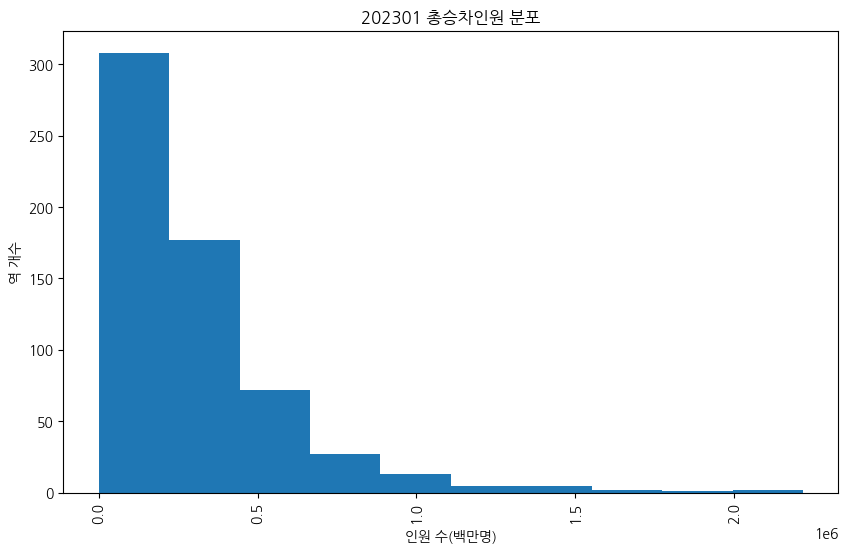

In [41]:
draw_hist('202301')

In [77]:
def avg_std():
    date = input('연도와 날짜를 입력하게')
    if date not in subwayDF['사용월'].values:
        print('그렇게 입력하면 안돼.')
        return None

    print(f'{date} 지하철 역별 평균 이용객수')
    for row in subwayDF[subwayDF['사용월'] == date].index:
        print(f"{subwayDF.iloc[row]['호선명']} {subwayDF.iloc[row]['지하철역']} :: {round(subwayDF.iloc[row]['평균승차인원'], 1)}명")

    print()    
    print(f'{date} 지하철 역별 이용객수 표준편차')
    for row in subwayDF[subwayDF['사용월'] == date].index:
        print(f"{subwayDF.iloc[row]['호선명']} {subwayDF.iloc[row]['지하철역']} :: {round(subwayDF.iloc[row]['표준편차'], 1)}")

def max_min():
    date = input('연도와 날짜를 입력하게')
    if date not in subwayDF['사용월'].values:
        print('그렇게 입력하면 안돼.')
        return None
    
    maxDF = max_pop(date)
    minDF = min_pop(date)
    
    print(f'{date} 가장 많은 이용객이 있는 역의 이용객 수')
    print(maxDF.iloc[0]['총승차인원'])
    print(f'{date} 가장 적은 이용객이 있는 역의 이용객 수')
    print(minDF.iloc[0]['총승차인원'])
    print()
    print(f'{date} 이용객 수가 가장 많은 역의 이름')
    print(maxDF[['호선명', '지하철역']])
    print()
    print(f'{date} 이용객 수가 가장 적은 역의 이름')
    print(minDF[['호선명', '지하철역']])

def draw_date_hist():
    date = input('연도와 날짜를 입력하게')
    if date not in subwayDF['사용월'].values:
        print('그렇게 입력하면 안돼.')
        return None
    
    draw_hist(date)
    

In [75]:
avg_std()

연도와 날짜를 입력하게 202301


202301 지하철 역별 평균 이용객수
1호선 동대문 :: 13096.8명
1호선 동묘앞 :: 10350.1명
1호선 서울역 :: 58317.3명
1호선 시청 :: 26778.5명
1호선 신설동 :: 15060.2명
1호선 제기동 :: 20348.5명
1호선 종각 :: 42121.1명
1호선 종로3가 :: 29962.1명
1호선 종로5가 :: 26904.2명
1호선 청량리(서울시립대입구) :: 22991.5명
2호선 강남 :: 92357.2명
2호선 강변(동서울터미널) :: 37122.7명
2호선 건대입구 :: 42394.2명
2호선 교대(법원.검찰청) :: 35398.3명
2호선 구로디지털단지 :: 64765.3명
2호선 구의(광진구청) :: 26767.5명
2호선 낙성대(강감찬) :: 30839.8명
2호선 당산 :: 19506.2명
2호선 대림(구로구청) :: 27437.9명
2호선 도림천 :: 1431.8명
2호선 동대문역사문화공원(DDP) :: 14713.9명
2호선 뚝섬 :: 24414.2명
2호선 문래 :: 23470.2명
2호선 방배 :: 17343.8명
2호선 봉천 :: 26911.0명
2호선 사당 :: 44052.5명
2호선 삼성(무역센터) :: 58590.1명
2호선 상왕십리 :: 15788.2명
2호선 서울대입구(관악구청) :: 52857.4명
2호선 서초 :: 24067.3명
2호선 선릉 :: 59289.1명
2호선 성수 :: 42983.4명
2호선 시청 :: 26468.6명
2호선 신답 :: 1856.2명
2호선 신당 :: 15855.1명
2호선 신대방 :: 28728.9명
2호선 신도림 :: 55908.6명
2호선 신림 :: 65082.1명
2호선 신설동 :: 4115.6명
2호선 신정네거리 :: 11500.5명
2호선 신촌 :: 41061.2명
2호선 아현 :: 11593.9명
2호선 양천구청 :: 7578.0명
2호선 역삼 :: 55409.1명
2호선 영등포구청 :: 23589.8명
2호선 왕십리(성동구청) :: 17748.5명


In [76]:
max_min()

연도와 날짜를 입력하게 202301


202301 가장 많은 이용객이 있는 역의 이용객 수
2216574
202301 가장 적은 이용객이 있는 역의 이용객 수
2
202301 이용객 수가 가장 많은 역의 이름
      호선명 지하철역
7403  2호선   강남
202301 이용객 수가 가장 적은 역의 이름
       호선명  지하철역
1642   경의선  김포공항
2094   7호선    상동
4544   7호선   까치울
5772   7호선   까치울
6408   7호선   신중동
...    ...   ...
61958  경의선    계양
62056  분당선    복정
64166  경의선    검암
64179  경의선   서울역
64190  경의선  홍대입구

[90 rows x 2 columns]


연도와 날짜를 입력하게 202301


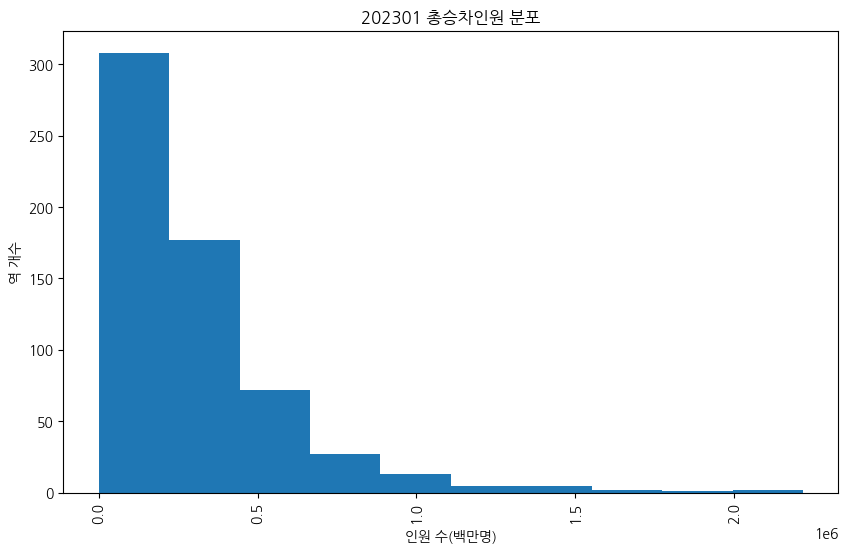

In [79]:
draw_date_hist()